# Predicting Breast Cancer in a patient                                                   


## Step #1: Import Libraries and datasets

In [40]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import LabelEncoder
import pickle
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#Load data,Convert CSV File to Dataframe

In [2]:
data=pd.read_csv("C:/Users/admin pc/Downloads/cancer.csv")

## Step #2: EDA - Explore/Visualize Dataset

In [4]:
#To get first 5 rows(records) of Data frame

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#To get number of rows and columns of our dataframe

In [4]:
data.shape

(569, 33)

In [8]:
#In the result displayed, you can see the data has 569 records, each with 32 columns.

In [5]:
# info() method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#For statistical summery we can use describe

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#Let's check null values in the data
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
#The feature unnamed contains 569 null values ,so let's drop it

In [8]:
data.drop("Unnamed: 32",axis=1,inplace=True)

<Axes: >

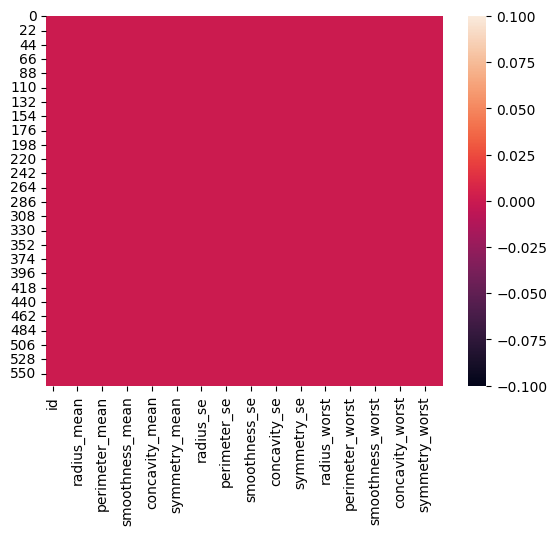

In [9]:
#Checking null value using heatmap
sns.heatmap(data.isnull())

In [10]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [17]:
#From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.
#Here i am using Label encoder to convert categorical variable(diagnosis) to numerical

In [11]:


encoder=LabelEncoder()
data.diagnosis=encoder.fit_transform(data.diagnosis)

#After encoding
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [19]:
#onverted B as 0 and M as 1

<Axes: xlabel='diagnosis', ylabel='count'>

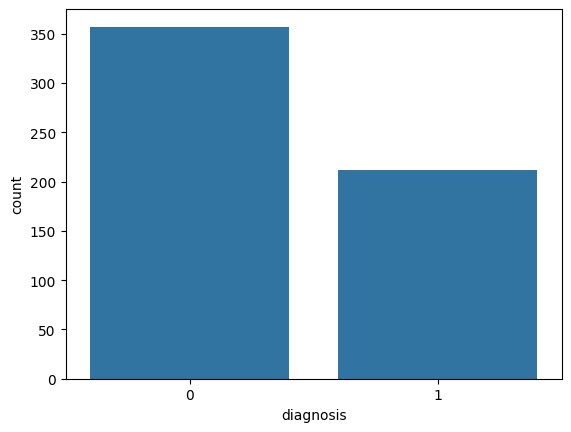

In [12]:
#we can visualise the counts of M and B (1 and 0) using countplot
sns.countplot(data,x='diagnosis')


<Axes: >

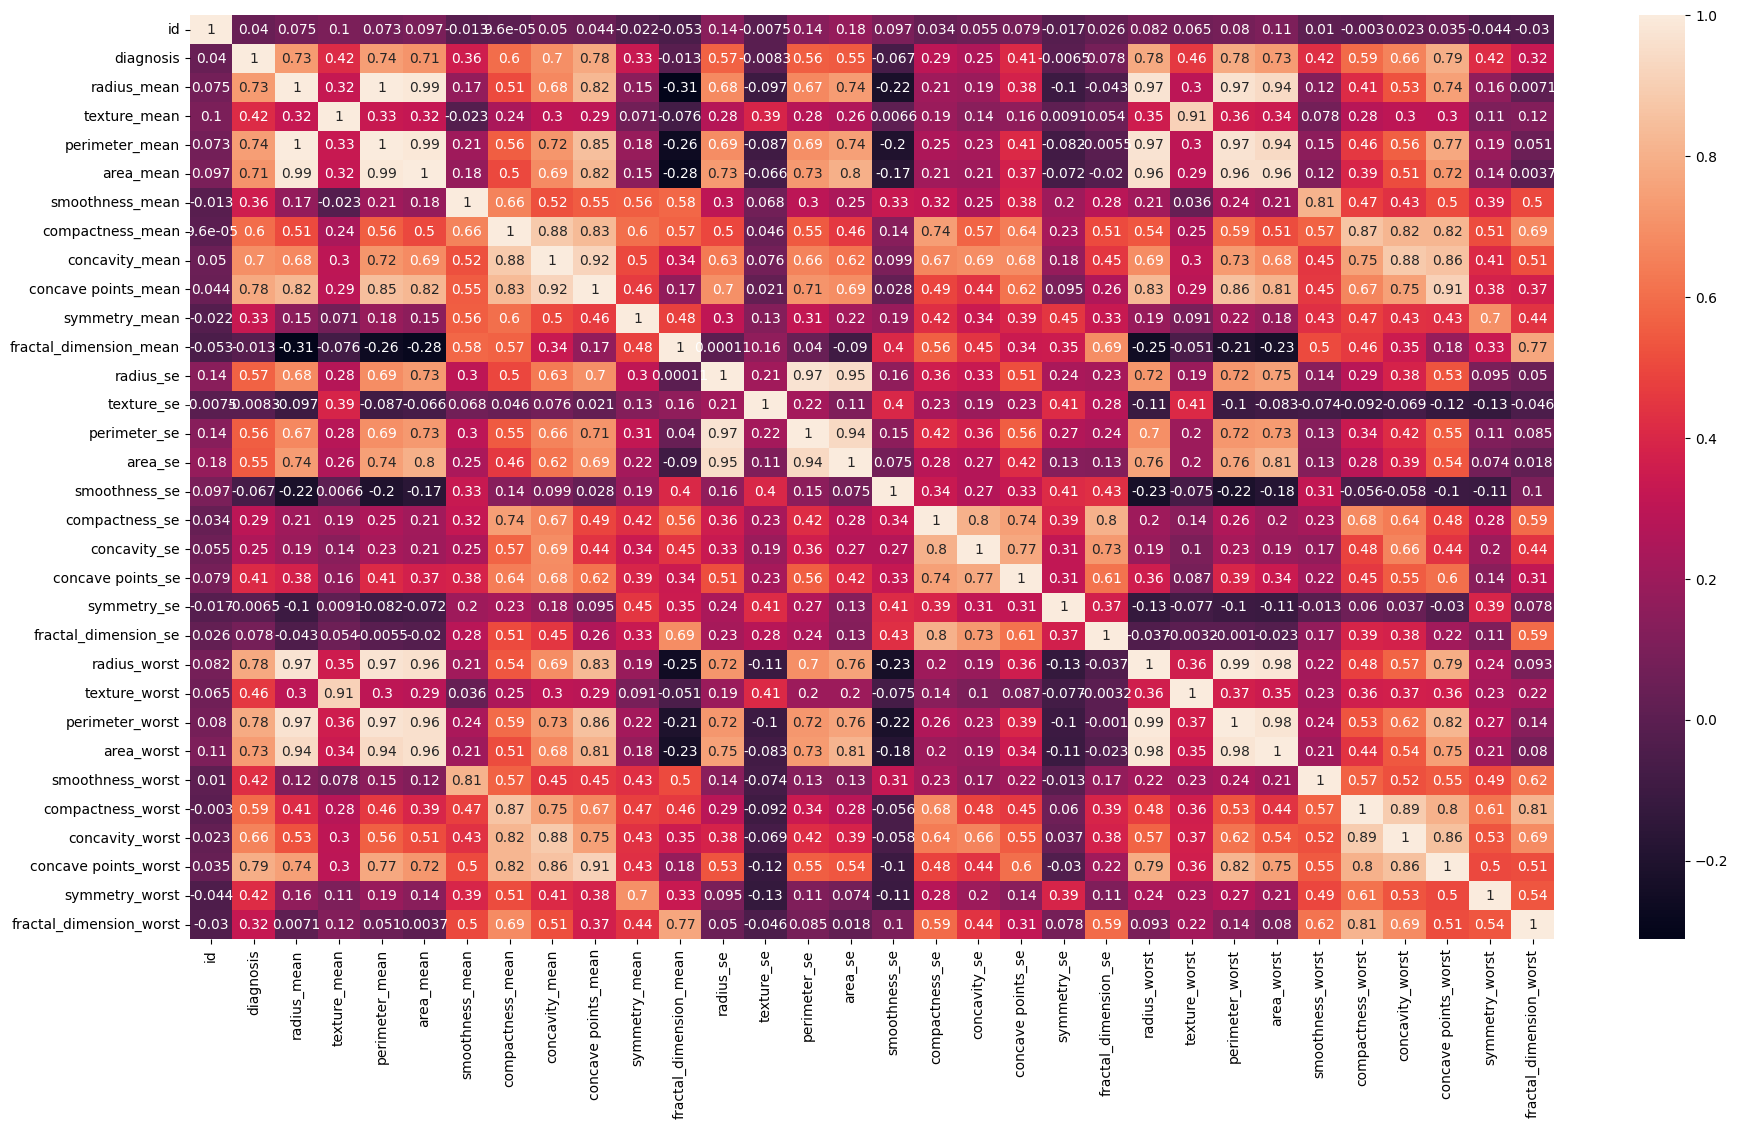

In [13]:
#It is good to check the correlations between the attributes. From the output graph below, The red around the diagonal suggests that attributes are correlated with each other. The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations.

plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True)

  

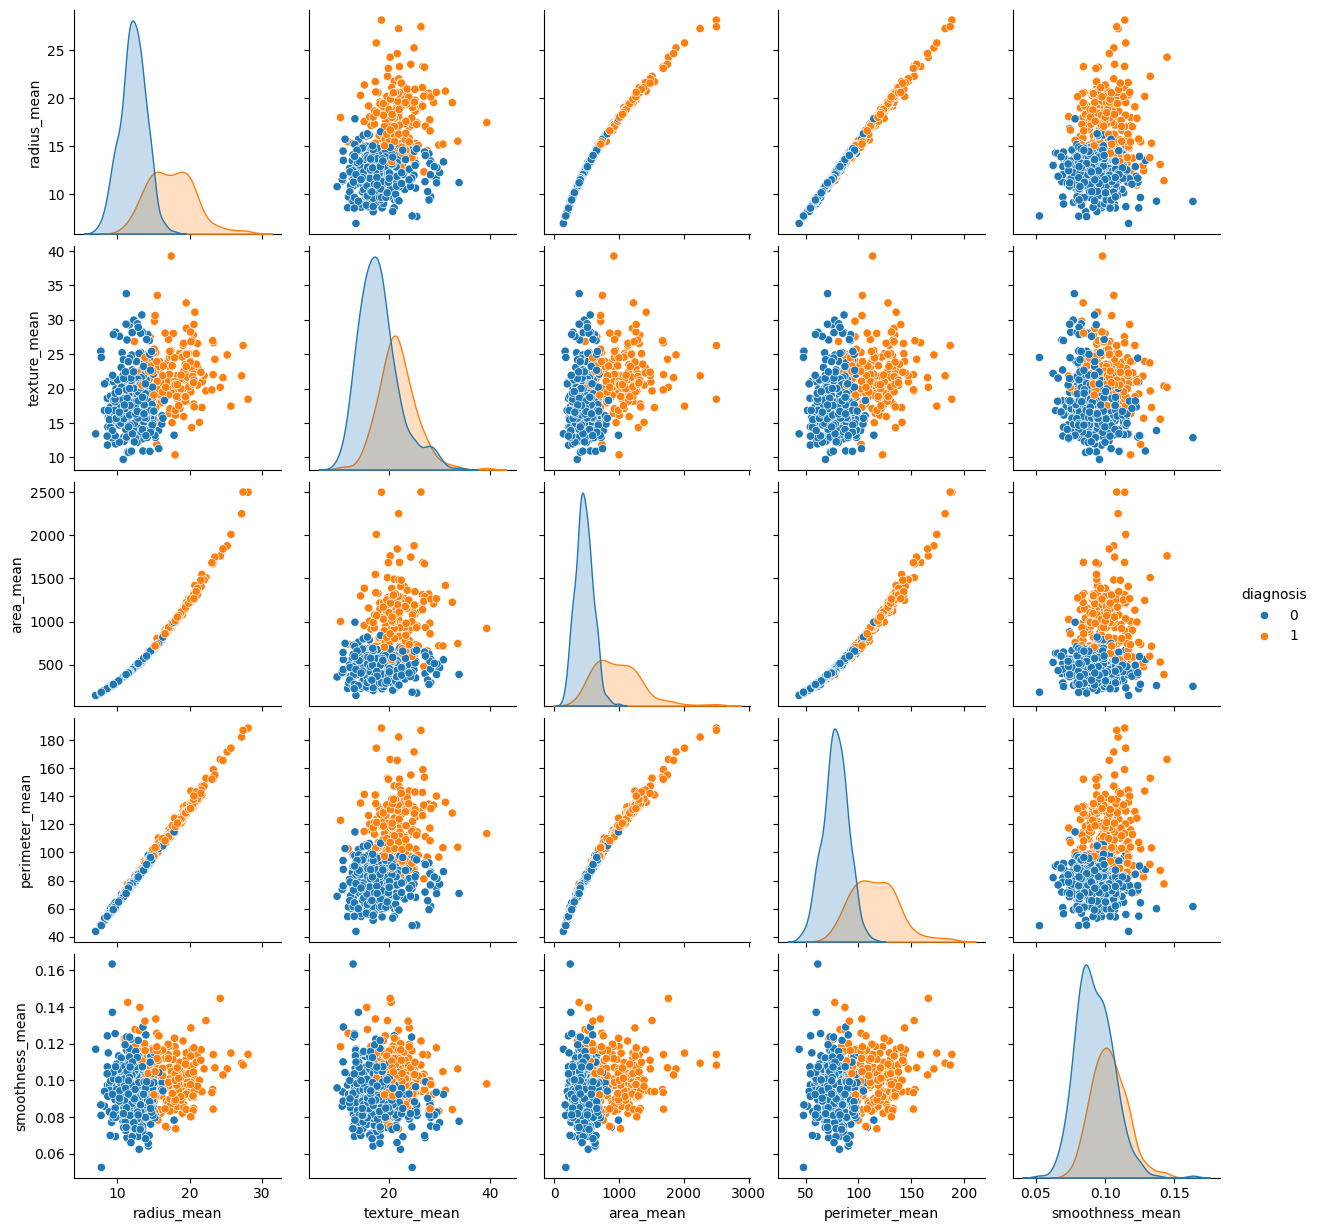

In [14]:
sns.pairplot(data, hue = 'diagnosis', vars = ['radius_mean','texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'])

## Step#3: Feature Selection

In [23]:


#Now We have to  do feature selection, It is the process of automatically choosing relevant features for our machine learning model.
#Here i have used selectKbest method for feature selection,Its a type of filter-based feature selection method in machine learning

In [15]:
select_k=SelectKBest(score_func=f_classif,k=15)

x=data.drop("diagnosis",axis=1)
y=data.diagnosis

x_new=select_k.fit_transform(x,y)

indices_seltd=select_k.get_support(indices=True)
features=data.columns[indices_seltd]
features

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')

In [25]:
#Above features are selected by selectKbest method 

In [16]:
data_new=pd.DataFrame(data,columns=['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'])

In [27]:
#Now let's check shape, distribution(normal or skewed) and outliers of selected features
#Below shows boxplot,histogram,violin plot to get idea about distribution and outliers in the features

In [17]:
data_new.shape

(569, 15)

skew : 0.5270671676029054


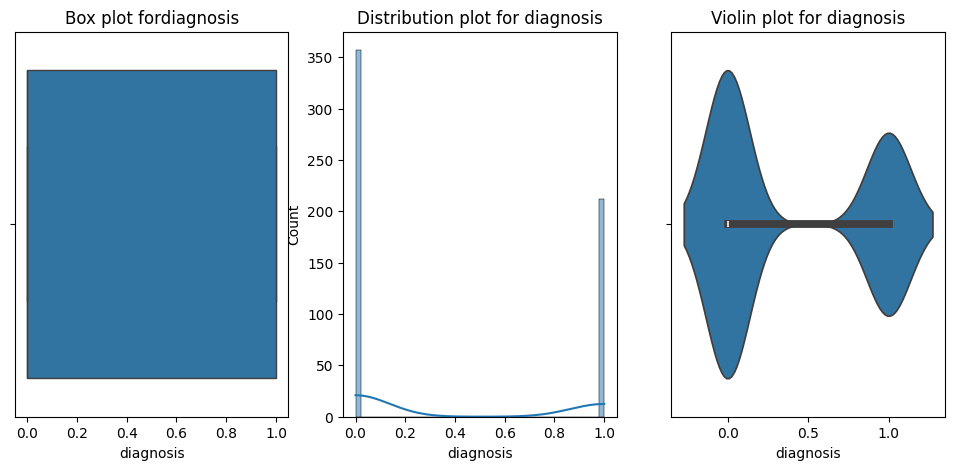

skew : 0.6487335672867015


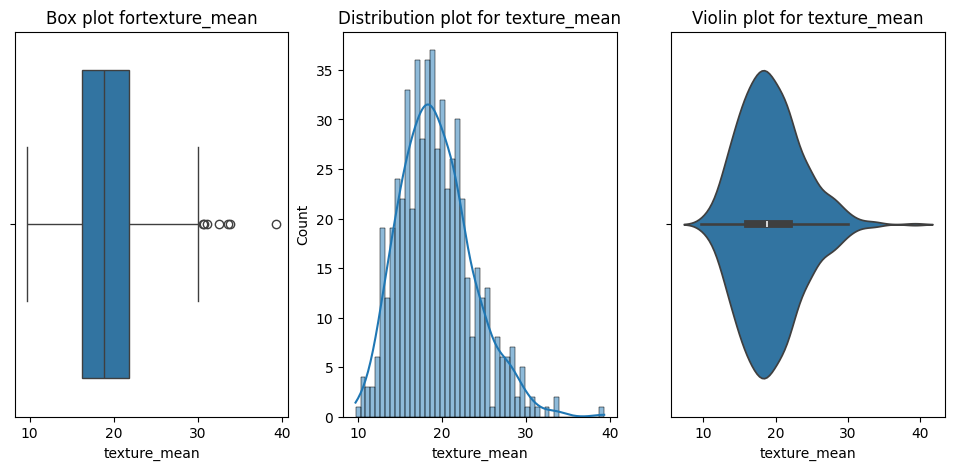

skew : 0.9880369541677213


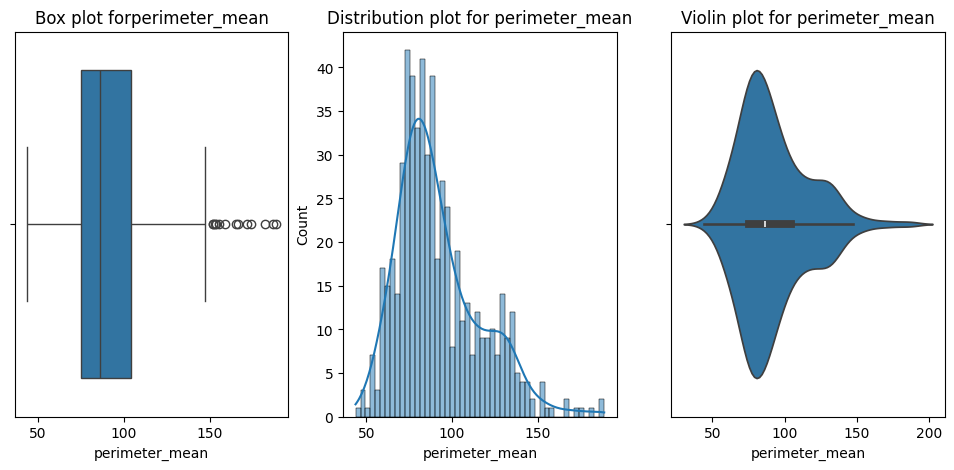

skew : 0.4551199203571718


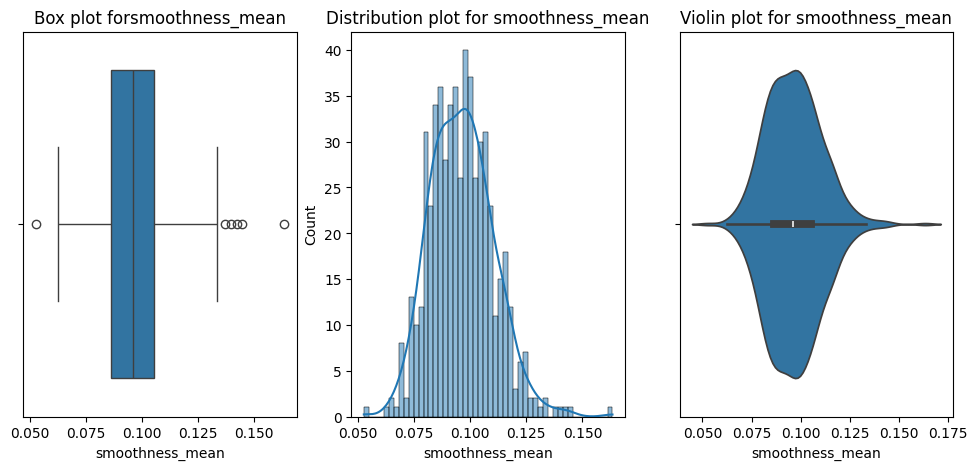

skew : 1.186983323974523


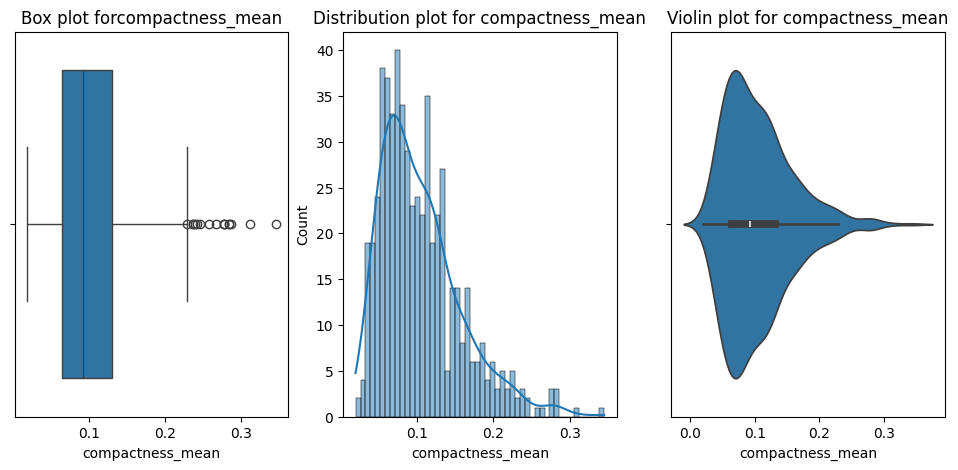

skew : 1.3974832352826647


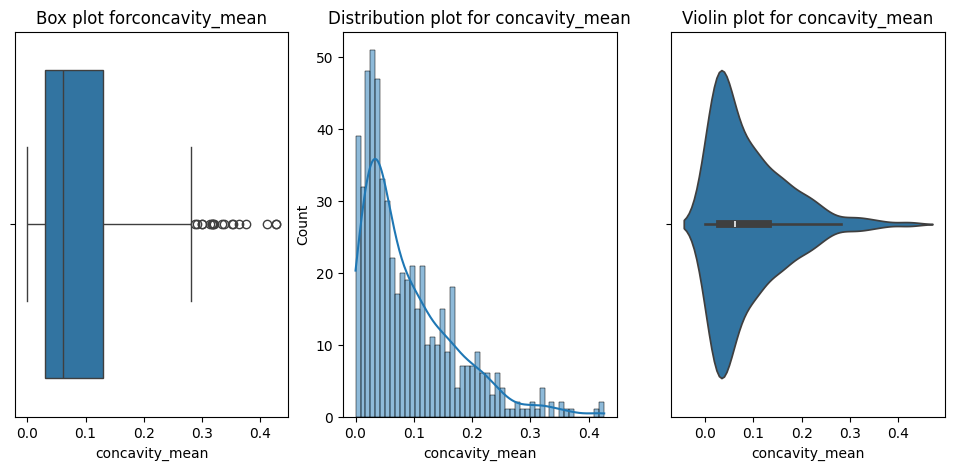

skew : 1.3010473927890858


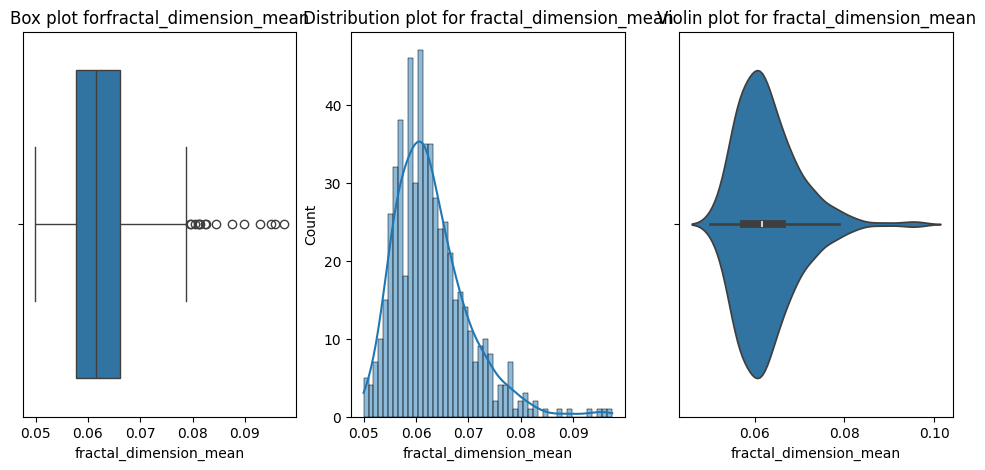

skew : 1.6421002649479612


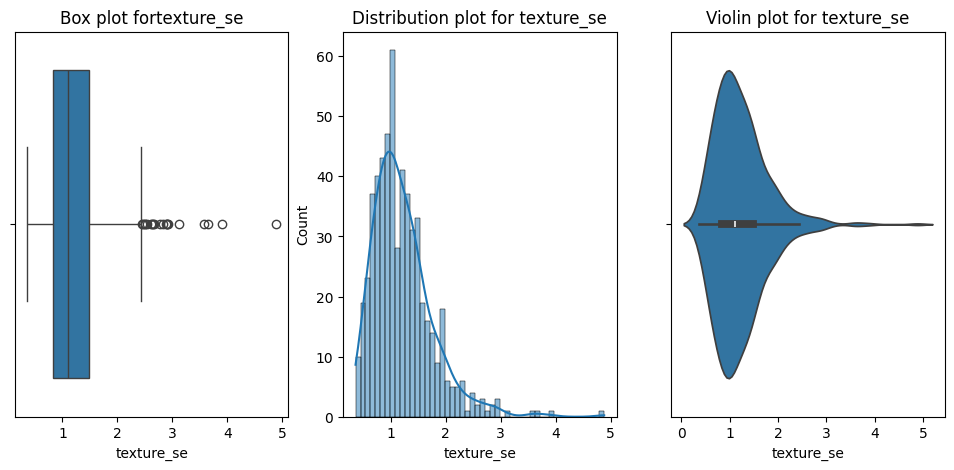

skew : 3.4345304746147067


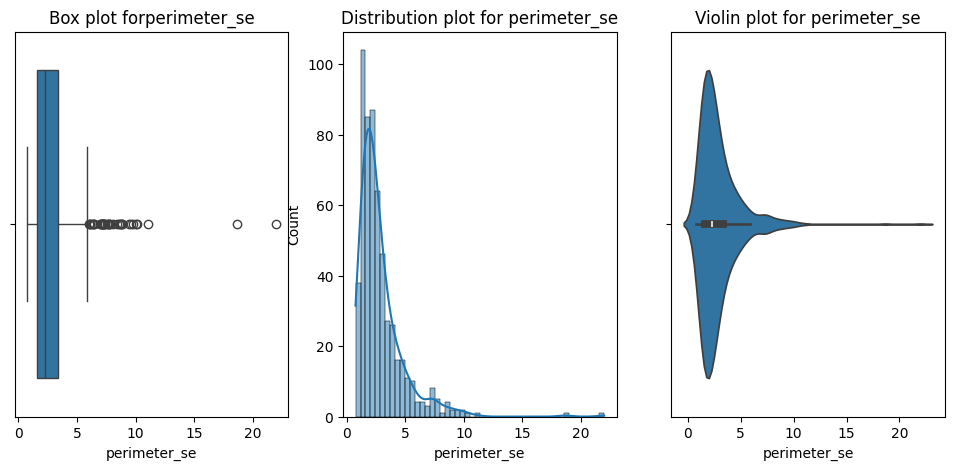

skew : 3.913616654675261


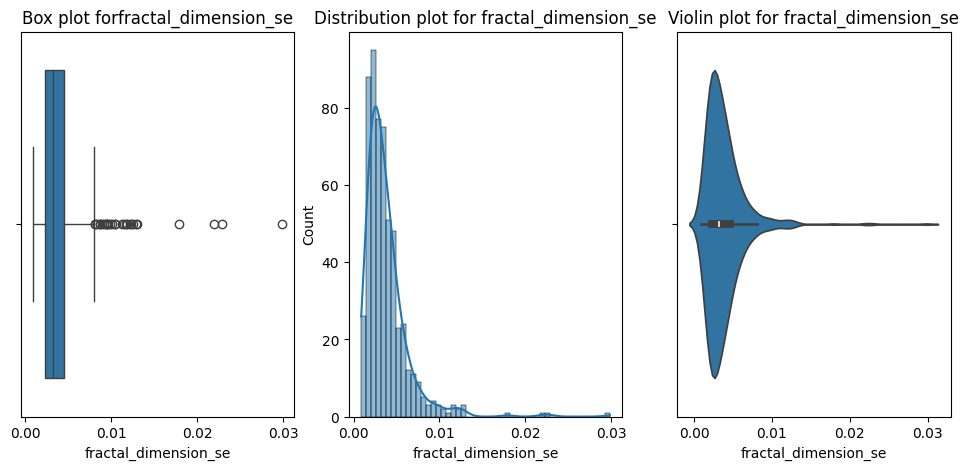

skew : 0.4970066697616781


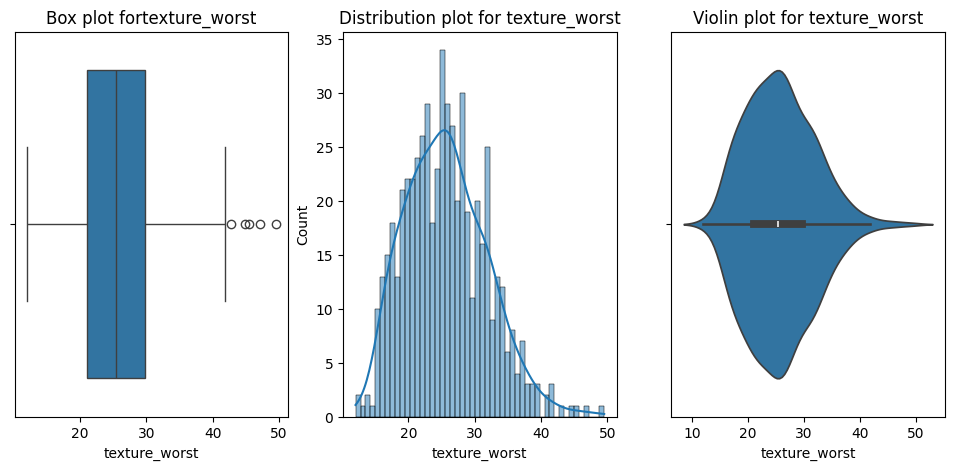

skew : 1.1251876208771259


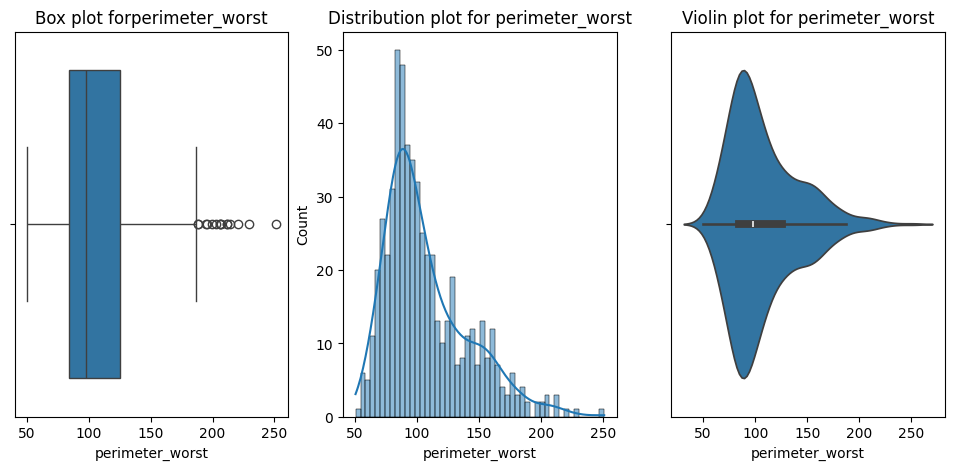

skew : 0.41433004572343024


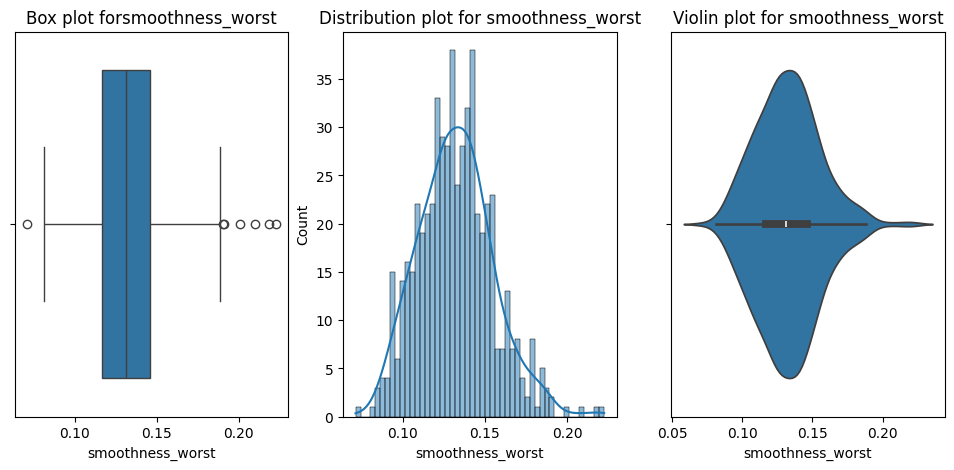

skew : 1.4696674610957545


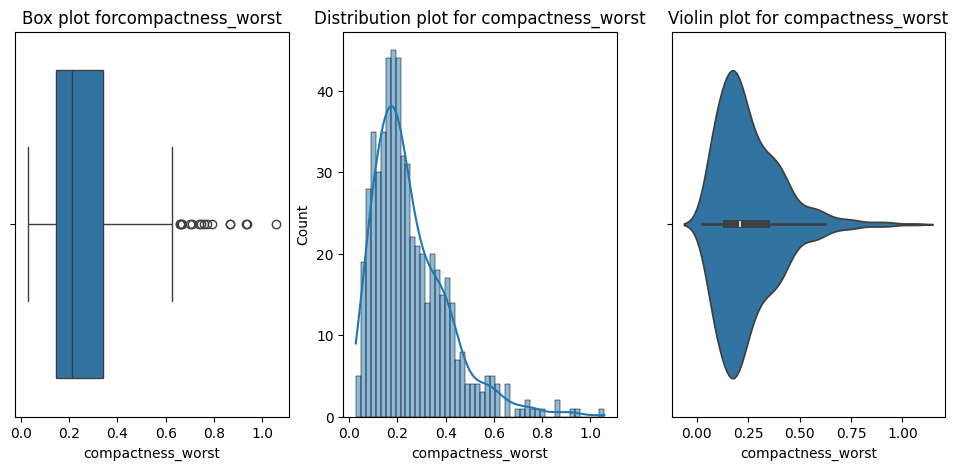

skew : 1.147202339994203


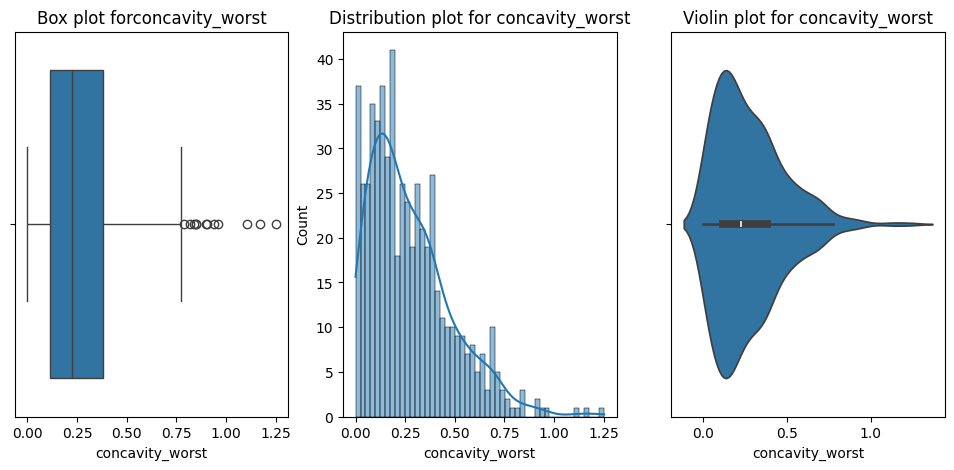

In [18]:
columns_=data_new.columns
def plot(df,column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Box plot for{column}')
    print("skew :", skew(df[column]))


    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,bins=50,kde=True)
    
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'Violin plot for {column}')
    plt.show()


columns_=data_new.columns
for item_ in columns_:
           plot(data_new,item_)



In [30]:
##From the above plots we can see that  some of the features  have skewed distribution ie,skeweness greater than 1,It can be normalize by removing outliers
#From above boxplot we can find that all the features have Outliers
#Going to remove the Outliers


In [20]:

column__=data_new.columns
def outlier(df,column):
    Q1=df[column].quantile(.25)
    Q3=df[column].quantile(.75)
    IQR=Q1-Q1
    upper_limit=Q3+(1.5*IQR)
    lower_limit=Q1-(1.5*IQR)
    df[column]=df[column].clip(upper_limit,lower_limit)
    return df

for item in column__:
         cleaned_data=outlier(data_new,item)


skew : 0.5270671676029054


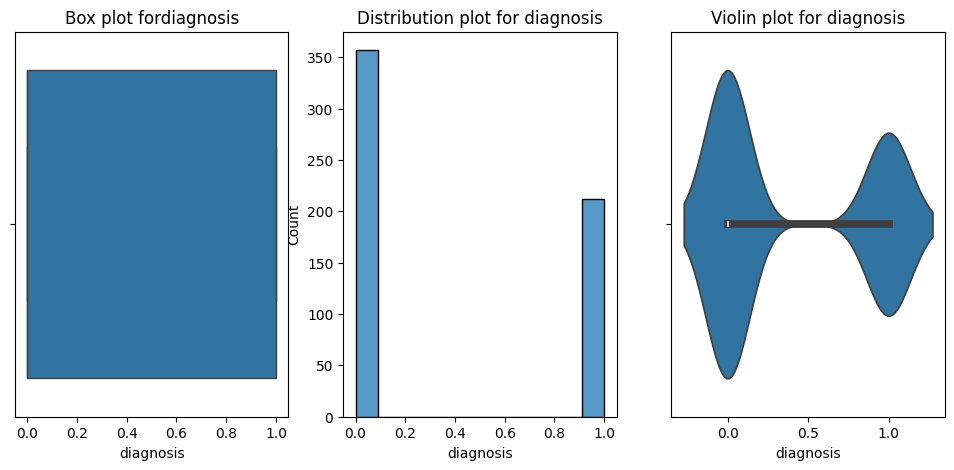

skew : 0.03255102359406754


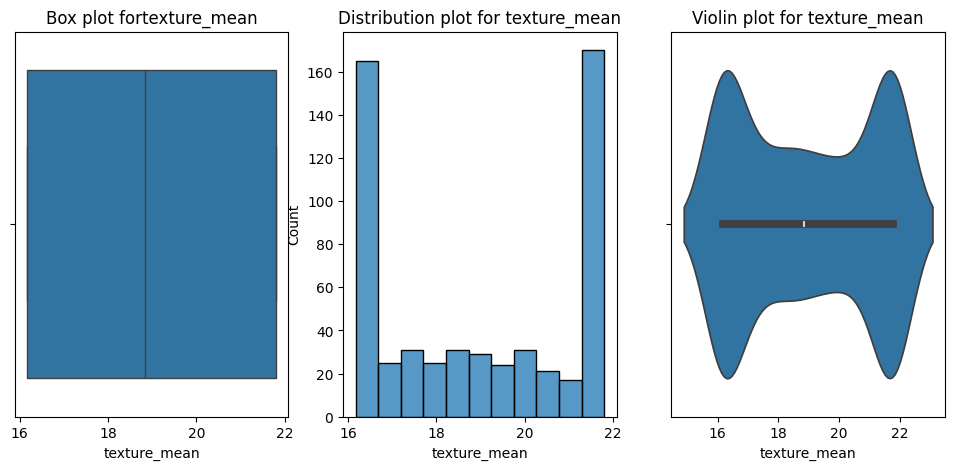

skew : 0.22425411947067875


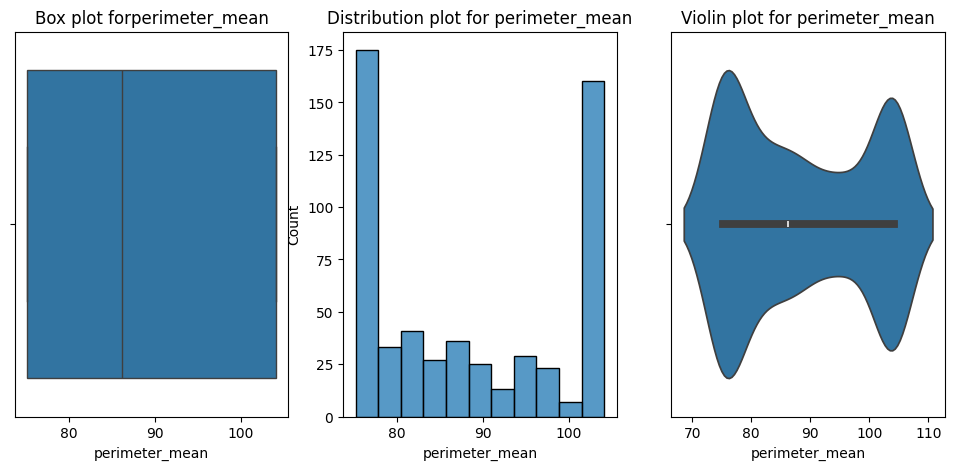

skew : 0.009648350290254949


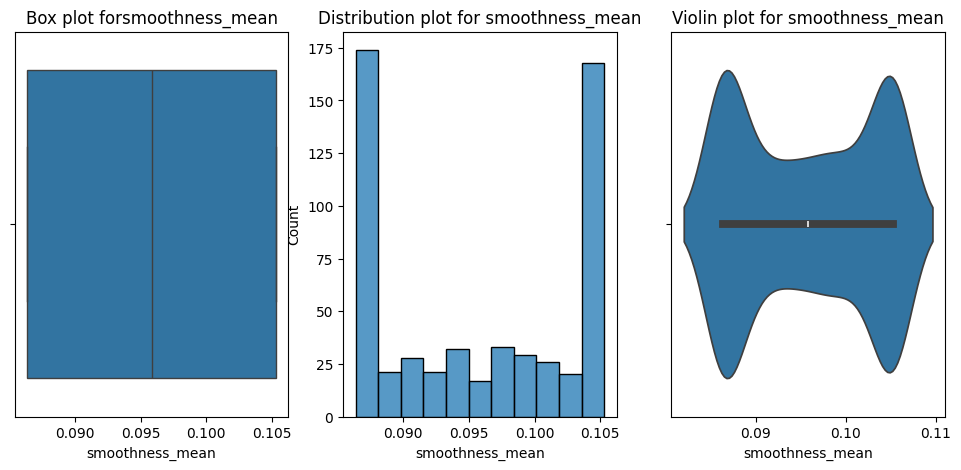

skew : 0.11326236099019281


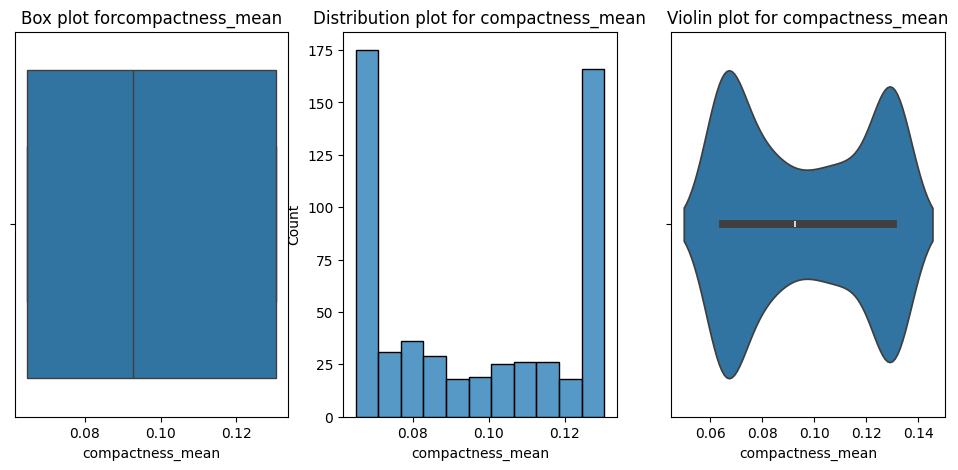

skew : 0.28780488283543726


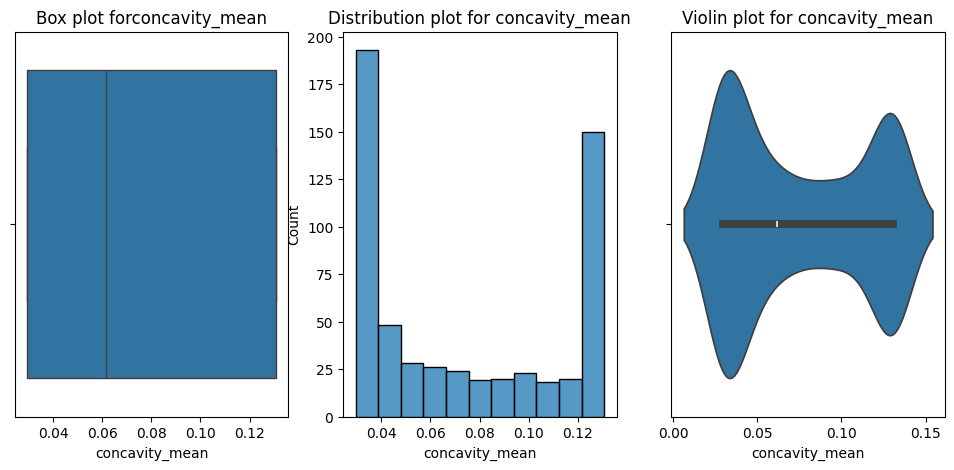

skew : 0.06624202346275763


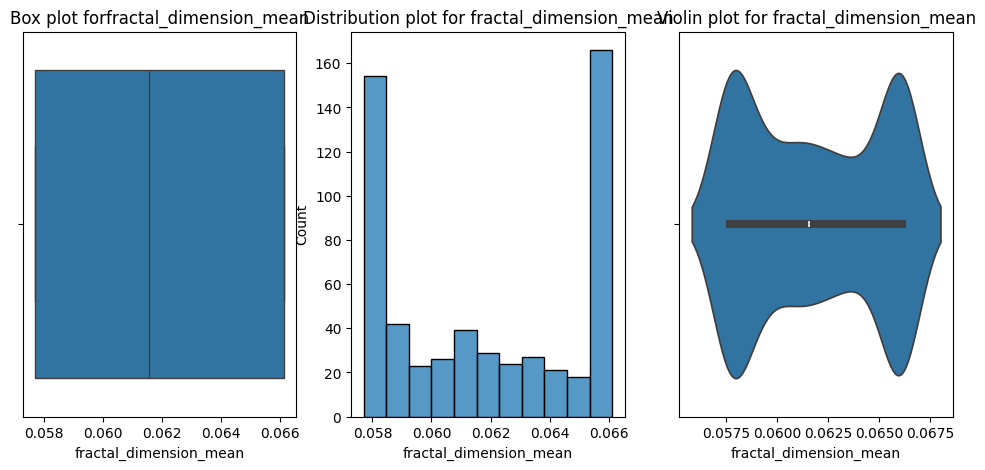

skew : 0.10494427996467882


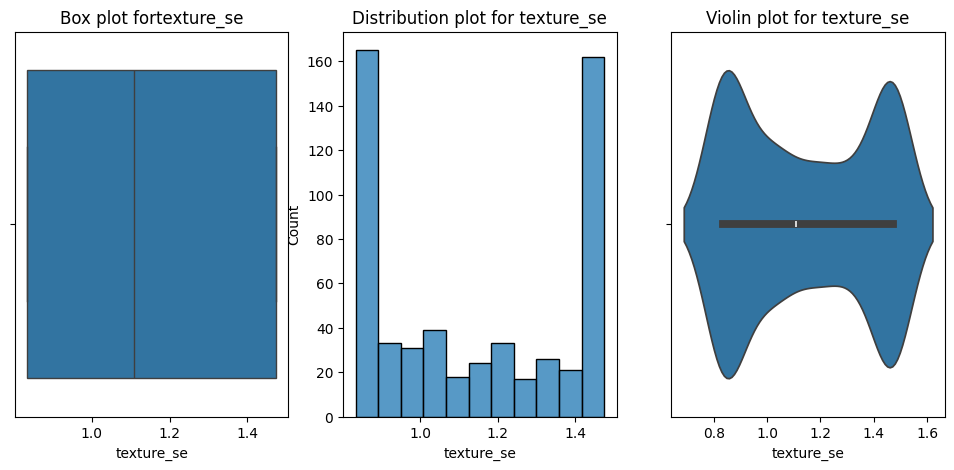

skew : 0.20859996295891348


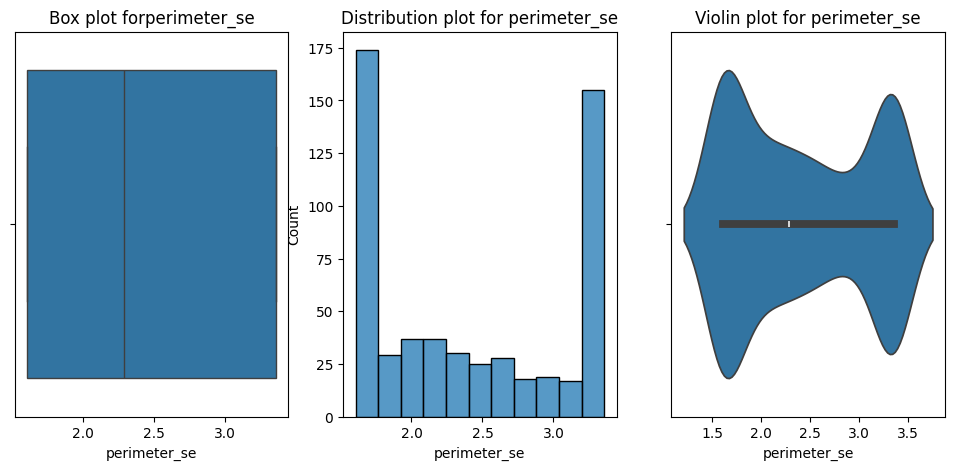

skew : 0.18951647651356318


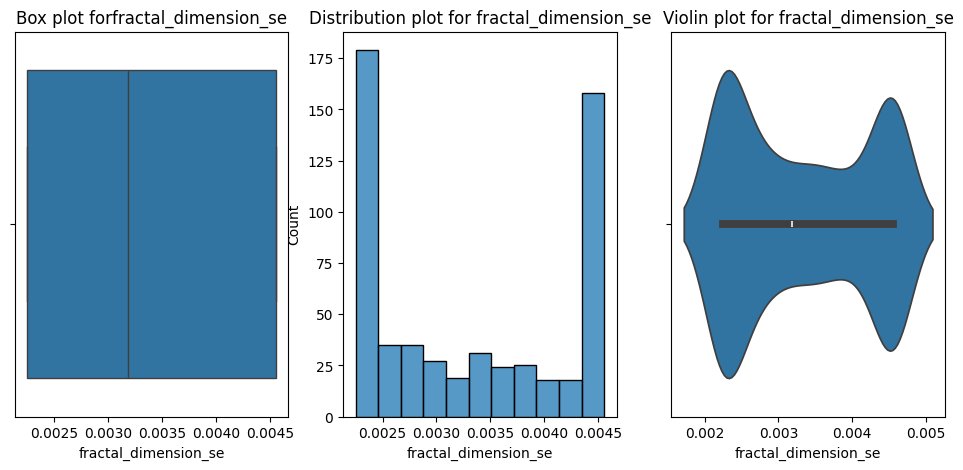

skew : 0.03096777260910495


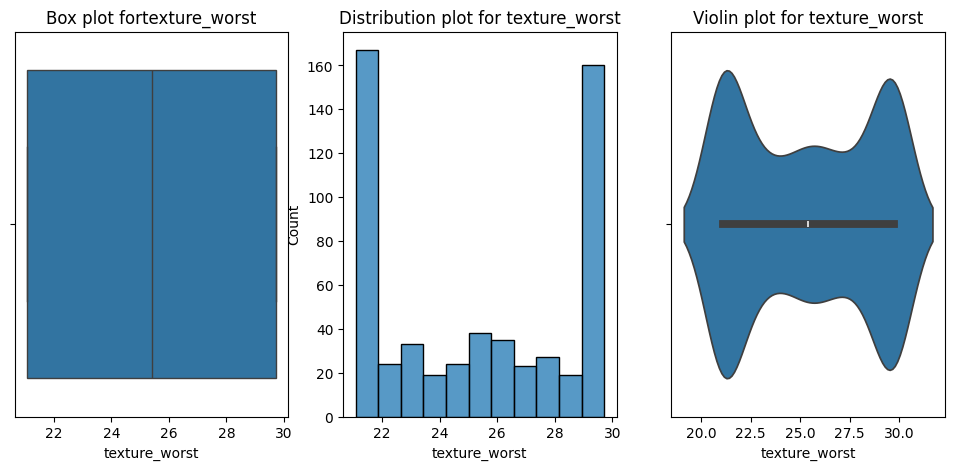

skew : 0.3251247008964414


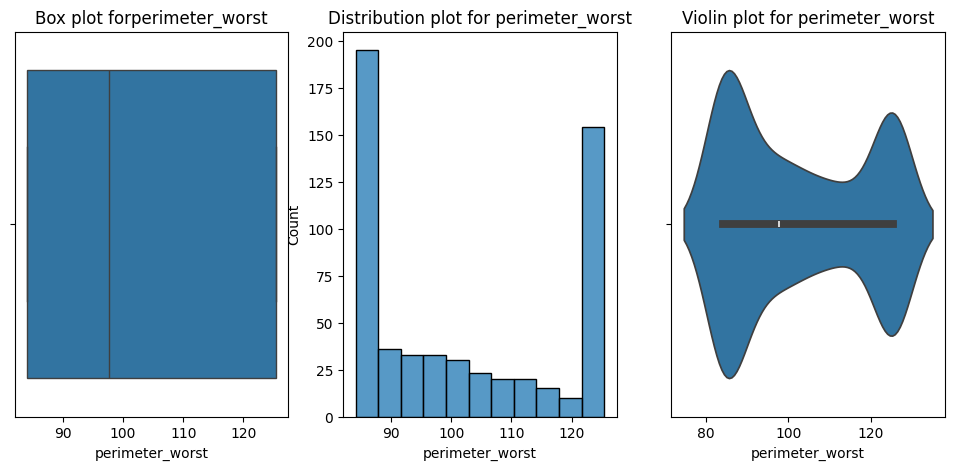

skew : -0.03413961733332495


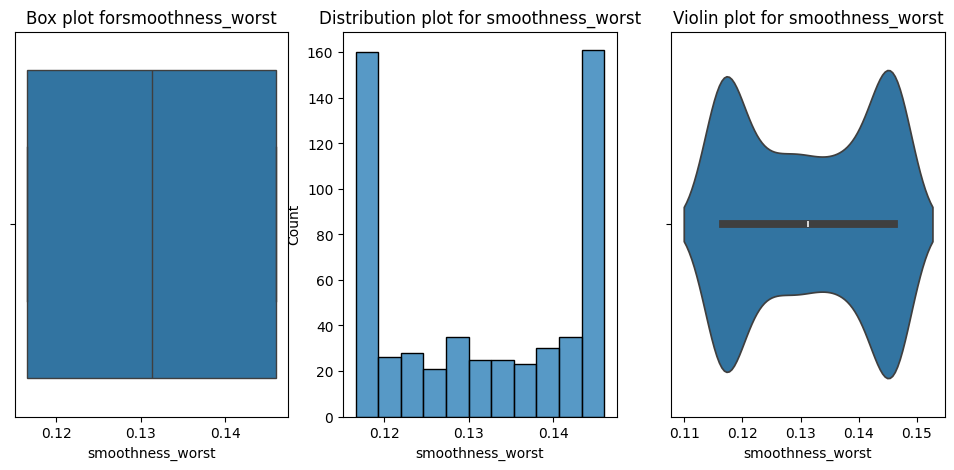

skew : 0.28122453059778546


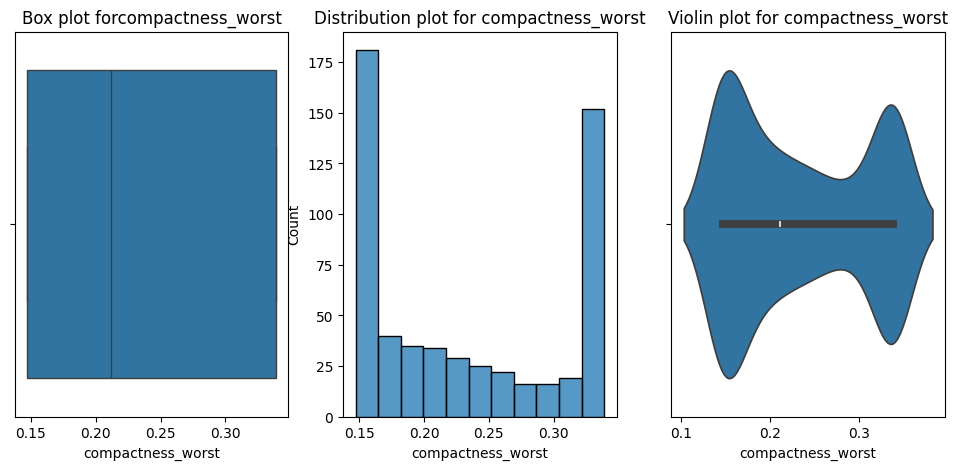

skew : 0.13704504727614447


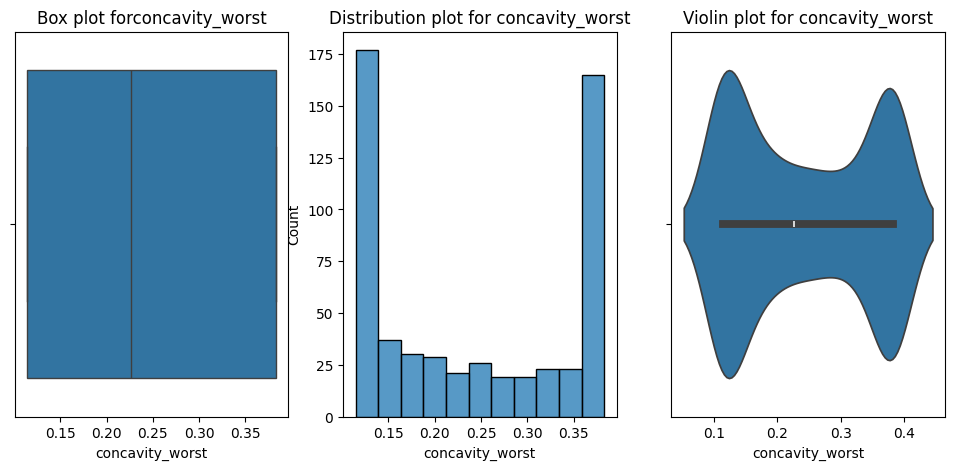

In [21]:
#Check distribution ,and outliers after processing
def plot_new(df1,column1):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df1,x=column1)
    plt.title(f'Box plot for{column1}')
    print("skew :", skew(df1[column1]))


    plt.subplot(1,3,2)
    sns.histplot(data=df1,x=column1)
    plt.title(f'Distribution plot for {column1}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df1,x=column1)
    plt.title(f'Violin plot for {column1}')
    plt.show()


columns_=data_new.columns
for item_1 in columns_:
           plot_new(cleaned_data,item_1)



In [33]:
#From the above figure,after removing the outliers skeweness of features get reduced

#Here completed the preprocessing of data,Now data is ready for training

## Step #4: Model Training and Evaluation

In [22]:
cleaned_data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [35]:
#data is imbalanced,to get balanced data use SMOTE

In [23]:
X=cleaned_data.drop("diagnosis",axis=1)
Y=cleaned_data.diagnosis
X_new,Y_new= SMOTETomek().fit_resample(X,Y)

In [24]:
Y_new.value_counts()


diagnosis
1    352
0    352
Name: count, dtype: int64

In [25]:
scale=StandardScaler()
X_scale=scale.fit_transform(X_new)

x_train,x_test,y_train,y_test=train_test_split(X_scale,Y_new,test_size=.3,random_state=101)

In [26]:
#Let's train the data using  ExtraTreesClassifier  algorithm
classification_model=SVC()
classification_model.fit(x_train,y_train)
Y_predict=classification_model.predict(x_test)

print("accuracy_score_test : ",accuracy_score(y_test,Y_predict))
print("\n")
print("classification_report : ")
print(classification_report(y_test,Y_predict))
print("\n")
print("confusion_matrix : ")
print(confusion_matrix(y_test,Y_predict))

accuracy_score_test :  0.9716981132075472


classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       109
           1       0.94      1.00      0.97       103

    accuracy                           0.97       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.97      0.97      0.97       212



confusion_matrix : 
[[103   6]
 [  0 103]]


<Axes: >

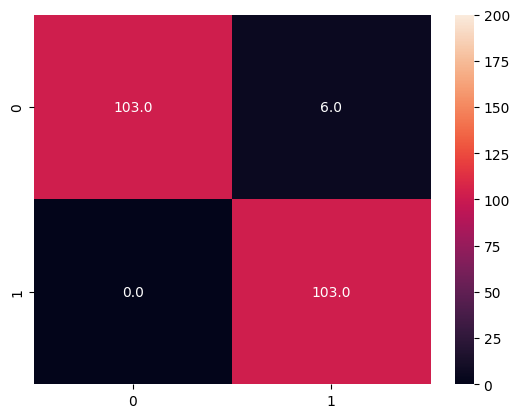

In [39]:
#Checking the accuracy of classifier using confusion matrix confusion_matrix in a heatmap
c_m=confusion_matrix(y_test,Y_predict)
sns.heatmap(c_m,annot=True,vmin=0, vmax=200,fmt=".1f")

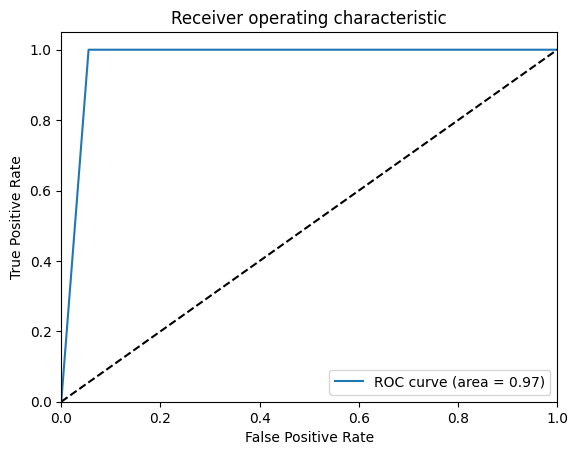

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,Y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
with open("classification_model.pk1","wb") as f:
          pickle.dump(classification_model,f)

with open("classification_scale.pk1","wb") as f1:
        pickle.dump(scale,f1)

In [43]:
#Let's check with unseen data

In [37]:

test=np.array([[16.17000,102.00000,0.09462,0.09462,0.07135,0.05770,0.83390,1.97200,0.00233,21.08000,114.30000,0.12230,0.19490,0.17090]])    
test1=scale.transform(test)
Ypre=classification_model.predict(test1)
if Ypre==1:
    print("Malignant")
else:
    print("Benign")    




Benign


In [38]:

test=np.array([[20.200000,104.100000,0.105300,0.130400,0.130700,0.066120,1.474000,3.357000,0.004558,23.990000,125.400000,0.146000,0.339100,0.382900]])    
test1=scale.transform(test)
Ypre=classification_model.predict(test1)
if Ypre==1:
    print("Malignant")
else:
    print("Benign")    




Malignant


In [46]:


#We can see that we achieve an accuracy of 97.169% on the held-out test dataset. From the confusion matrix, there is only 6 case of mis-classification. The performance of this algorithm is expected to be high given the symptoms for breast cancer should exchibit certain clear patterns.


In [47]:
#Next i have created a streamlit app ,it allows the user(medical profossionals) to give cell information of patients and will get the result as whether the patient have breast cancer or not